In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
mines=pd.read_csv('/content/drive/MyDrive/MiningProcess_Flotation_Plant_Database.csv', decimal=',', parse_dates=['date'])
mines.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [5]:
mines.shape

(737453, 24)

In [6]:
mines.dtypes

date                            datetime64[ns]
% Iron Feed                            float64
% Silica Feed                          float64
Starch Flow                            float64
Amina Flow                             float64
Ore Pulp Flow                          float64
Ore Pulp pH                            float64
Ore Pulp Density                       float64
Flotation Column 01 Air Flow           float64
Flotation Column 02 Air Flow           float64
Flotation Column 03 Air Flow           float64
Flotation Column 04 Air Flow           float64
Flotation Column 05 Air Flow           float64
Flotation Column 06 Air Flow           float64
Flotation Column 07 Air Flow           float64
Flotation Column 01 Level              float64
Flotation Column 02 Level              float64
Flotation Column 03 Level              float64
Flotation Column 04 Level              float64
Flotation Column 05 Level              float64
Flotation Column 06 Level              float64
Flotation Col

In [7]:
# check the number of null elements in the dataframe
mines.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [8]:
mines['% Silica Concentrate'].mean()

2.326763251352968

In [9]:
mines['% Iron Concentrate'].max()

68.01

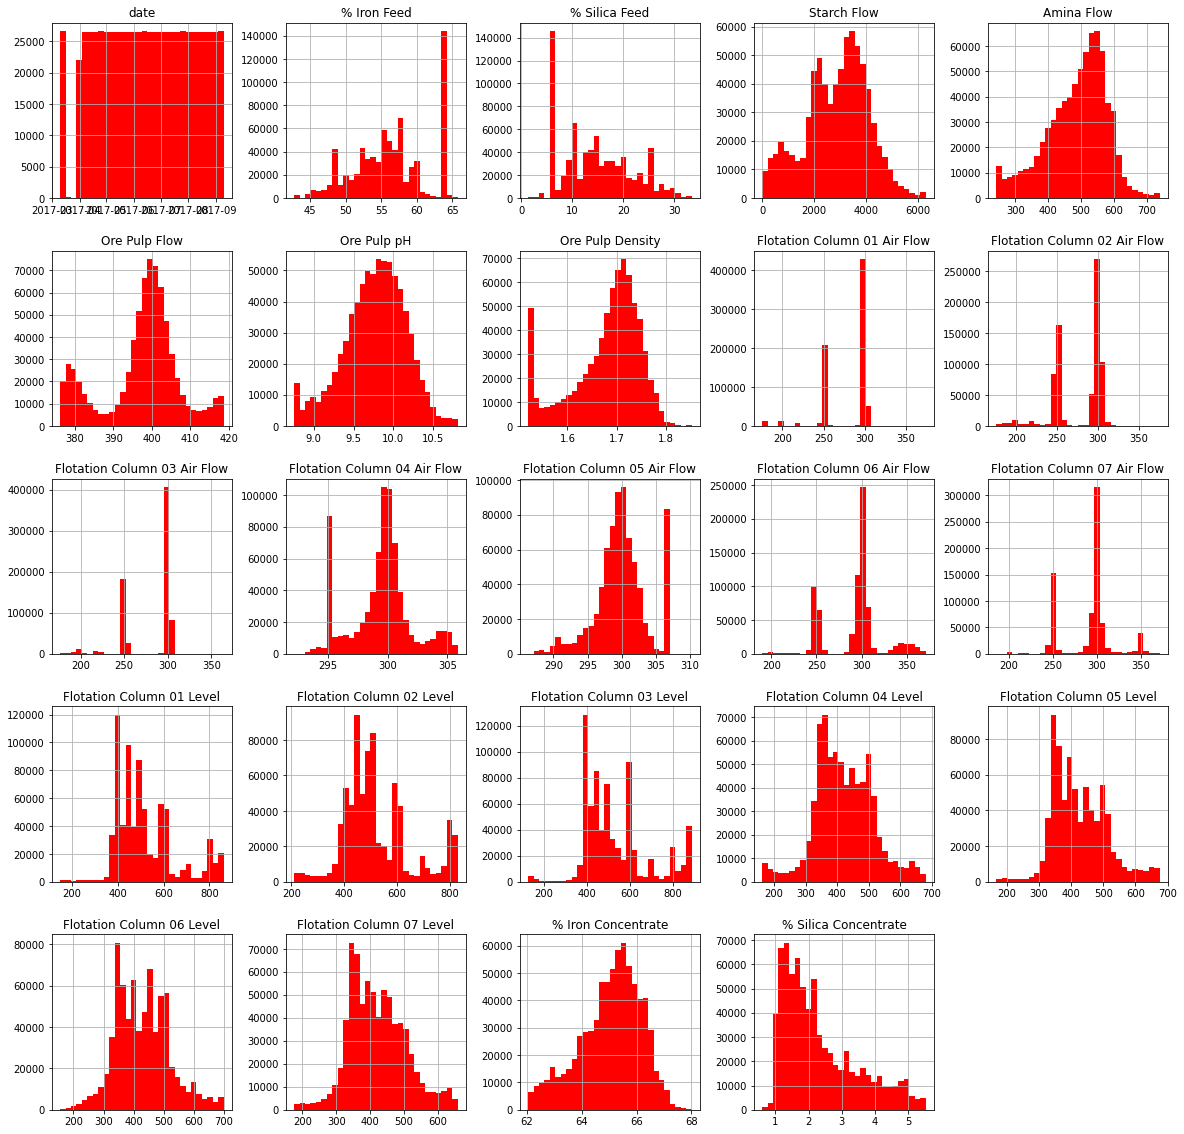

In [10]:
# histogram plot of all features
mines.hist(bins=30, figsize= (20, 20), color='r')
plt.title('Histogram plot of all features')
plt.show()

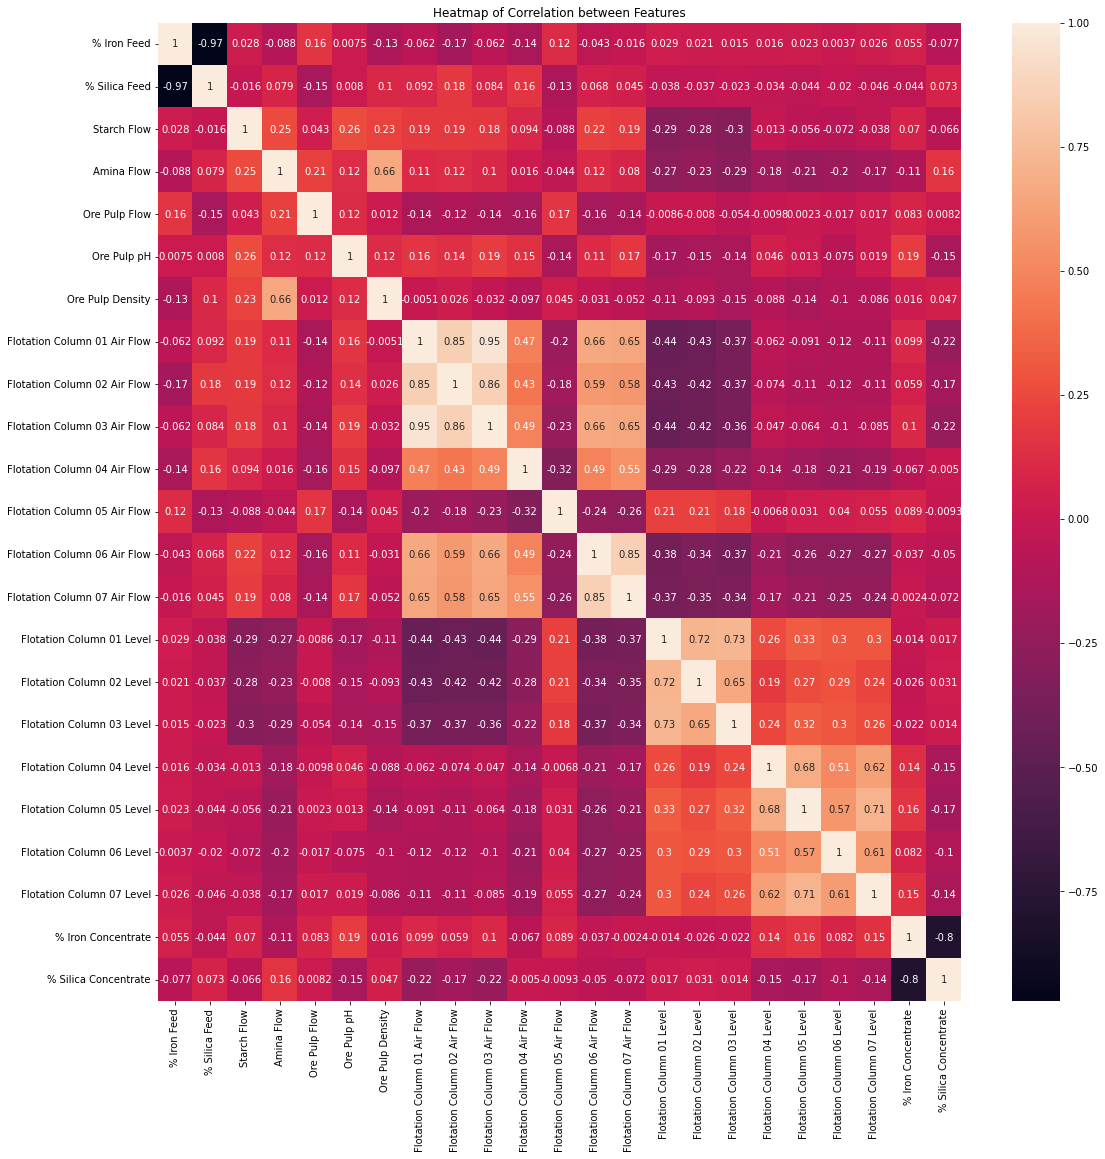

In [11]:
# Obtain the correlation matrix
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(mines.corr(), annot=True)
plt.title('Heatmap of Correlation between Features')
plt.show()


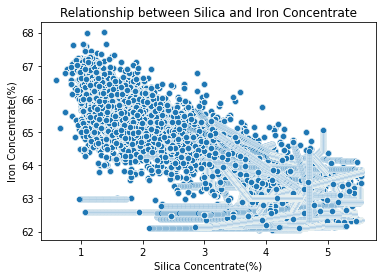

In [12]:
sns.scatterplot(x='% Silica Concentrate', y='% Iron Concentrate', data=mines)
plt.xlabel('Silica Concentrate(%)')
plt.ylabel('Iron Concentrate(%)')
plt.title('Relationship between Silica and Iron Concentrate')
plt.show()

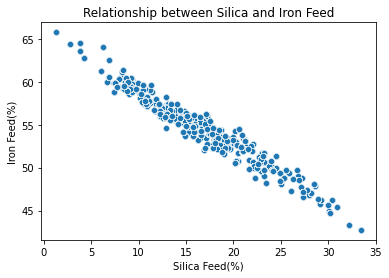

In [13]:
sns.scatterplot(x='% Silica Feed', y='% Iron Feed', data=mines)
plt.xlabel('Silica Feed(%)')
plt.ylabel('Iron Feed(%)')
plt.title('Relationship between Silica and Iron Feed')
plt.show()

In [14]:
df_iron = mines.drop(columns = ['date', '% Silica Concentrate'])
df_iron_target = mines['% Silica Concentrate']

In [15]:
df_iron.shape


(737453, 22)

In [16]:
df_iron_target.shape

(737453,)

In [17]:
df_iron = np.array(df_iron)
df_iron_target = np.array(df_iron_target)

In [18]:
# reshaping the array to be the way scikit learn expects
df_iron_target = df_iron_target.reshape(-1,1)
df_iron_target.shape

(737453, 1)

In [19]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_iron, df_iron_target, test_size=0.2)
X_train.shape, X_test.shape

((589962, 22), (147491, 22))

In [20]:
# scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [31]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train_scaled, y_train)

DummyRegressor()

In [24]:
y_preds=dummy_regr.predict(X_test_scaled)

In [32]:
accuracy = dummy_regr.score(X_test_scaled, y_test)
accuracy

-3.1978849728275804e-05

In [25]:
mean_squared_error(y_test, y_preds, squared=False)

1.1240588464770302

In [26]:
mean_squared_error(y_test, y_preds, squared=True)

1.263508290343272

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [28]:
linearRegression_model = LinearRegression()
linearRegression_model.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
accuracy = linearRegression_model.score(X_test_scaled, y_test)
accuracy

0.679109906942205

In [33]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model

DecisionTreeRegressor()

In [34]:
dt_model.fit(X_train_scaled, y_train)
dt_model.score(X_test_scaled, y_test)

0.9943344942131604

In [ ]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

rf_model.score(X_test_scaled, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.8839033404663004

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False)
ANN_model = keras.Sequential()
ANN_model.add(Dense(250, input_dim = 22, kernel_initializer='normal',activation='relu'))
ANN_model.add(Dense(500,activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(500, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(250, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(250, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1, activation = 'linear'))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               5750      
                                                                 
 dense_1 (Dense)             (None, 500)               125500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              501000    
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0

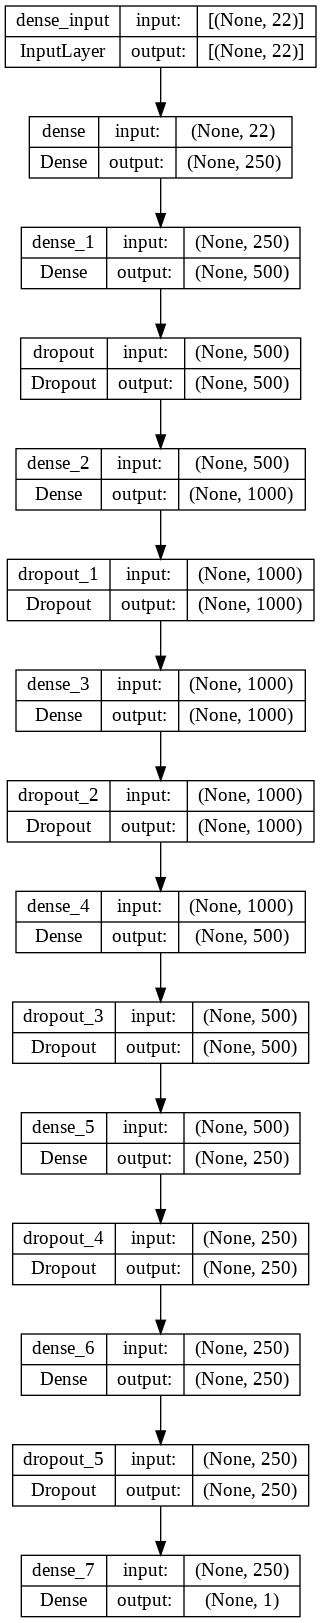

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(ANN_model, show_shapes=True)

In [ ]:
history = ANN_model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
14750/14750 [==============================] - 477s 32ms/step - loss: 0.2254 - val_loss: 0.1664
Epoch 2/50
14750/14750 [==============================] - 481s 33ms/step - loss: 0.1382 - val_loss: 0.0988
Epoch 3/50
14750/14750 [==============================] - 481s 33ms/step - loss: 0.1128 - val_loss: 0.0880
Epoch 4/50
14750/14750 [==============================] - 476s 32ms/step - loss: 0.1034 - val_loss: 0.0823
Epoch 5/50
14750/14750 [==============================] - 473s 32ms/step - loss: 0.1004 - val_loss: 0.0855
Epoch 6/50
14750/14750 [==============================] - 473s 32ms/step - loss: 0.0972 - val_loss: 0.0725
Epoch 7/50
14750/14750 [==============================] - 473s 32ms/step - loss: 0.0956 - val_loss: 0.0758
Epoch 8/50
 9570/14750 [==================>...........] - ETA: 2:38 - loss: 0.0986

In [ ]:
result = ANN_model.evaluate(X_test_scaled, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [ ]:
y_predict = dt_model.predict(X_test_scaled)
plt.plot(y_predict, y_test, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True values')
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 